In [1]:
# importing necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the dataset
crop_data=pd.read_csv("Crop_recommendation.csv")
crop_data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,25,21,22,21,rice
1,85,58,41,21,25,25,23,rice
2,60,55,44,20,22,25,20,rice
3,74,35,40,24,20,20,20,rice
4,78,42,42,22,22,21,22,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,25,21,20,21,coffee
2196,99,15,27,21,24,20,22,coffee
2197,118,33,30,23,21,25,25,coffee
2198,117,32,34,21,21,21,20,coffee


In [3]:
#rows and columns
crop_data.shape

(2200, 8)

In [4]:
#checking basic information against columns
crop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   N            2200 non-null   int64 
 1   P            2200 non-null   int64 
 2   K            2200 non-null   int64 
 3   temperature  2200 non-null   int64 
 4   humidity     2200 non-null   int64 
 5   ph           2200 non-null   int64 
 6   rainfall     2200 non-null   int64 
 7   label        2200 non-null   object
dtypes: int64(7), object(1)
memory usage: 137.6+ KB


There is no null data rows so we don't need to replace it using mean values or drop columns.

In [5]:
# dataset columns
crop_data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [6]:
#Changing the name of label to Crop for readability
crop_data.rename(columns = {'label':'Crop'}, inplace = True)
crop_data

,N,P,K,temperature,humidity,ph,rainfall,Crop
0,90,42,43,25,21,22,21,rice
1,85,58,41,21,25,25,23,rice
2,60,55,44,20,22,25,20,rice
3,74,35,40,24,20,20,20,rice
4,78,42,42,22,22,21,22,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,25,21,20,21,coffee
2196,99,15,27,21,24,20,22,coffee
2197,118,33,30,23,21,25,25,coffee
2198,117,32,34,21,21,21,20,coffee


In [7]:
# statistical inference of the dataset
crop_data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,22.445000,22.521818,22.506818,22.481364
std,36.917334,32.985883,50.647931,1.727627,1.683312,1.697428,1.695195
min,0.000000,5.000000,5.000000,20.000000,20.000000,20.000000,20.000000
25%,21.000000,28.000000,20.000000,21.000000,21.000000,21.000000,21.000000
50%,37.000000,51.000000,32.000000,22.000000,23.000000,22.000000,22.000000
75%,84.250000,68.000000,49.000000,24.000000,24.000000,24.000000,24.000000
max,140.000000,145.000000,205.000000,25.000000,25.000000,25.000000,25.000000


In [8]:
#Checking missing values of the dataset in each column
crop_data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
Crop           0
dtype: int64

In [9]:
#Dropping missing values 
crop_data = crop_data.dropna()
crop_data

,N,P,K,temperature,humidity,ph,rainfall,Crop
0,90,42,43,25,21,22,21,rice
1,85,58,41,21,25,25,23,rice
2,60,55,44,20,22,25,20,rice
3,74,35,40,24,20,20,20,rice
4,78,42,42,22,22,21,22,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,25,21,20,21,coffee
2196,99,15,27,21,24,20,22,coffee
2197,118,33,30,23,21,25,25,coffee
2198,117,32,34,21,21,21,20,coffee


In [11]:
crop_data.Crop.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [12]:
# get top 5 most frequent growing crops
n = 5
crop_data['Crop'].value_counts()[:5].index.tolist()

['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas']

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'rice'),
  Text(1, 0, 'maize'),
  Text(2, 0, 'chickpea'),
  Text(3, 0, 'kidneybeans'),
  Text(4, 0, 'pigeonpeas'),
  Text(5, 0, 'mothbeans'),
  Text(6, 0, 'mungbean'),
  Text(7, 0, 'blackgram'),
  Text(8, 0, 'lentil'),
  Text(9, 0, 'pomegranate'),
  Text(10, 0, 'banana'),
  Text(11, 0, 'mango'),
  Text(12, 0, 'grapes'),
  Text(13, 0, 'watermelon'),
  Text(14, 0, 'muskmelon'),
  Text(15, 0, 'apple'),
  Text(16, 0, 'orange'),
  Text(17, 0, 'papaya'),
  Text(18, 0, 'coconut'),
  Text(19, 0, 'cotton'),
  Text(20, 0, 'jute'),
  Text(21, 0, 'coffee')])

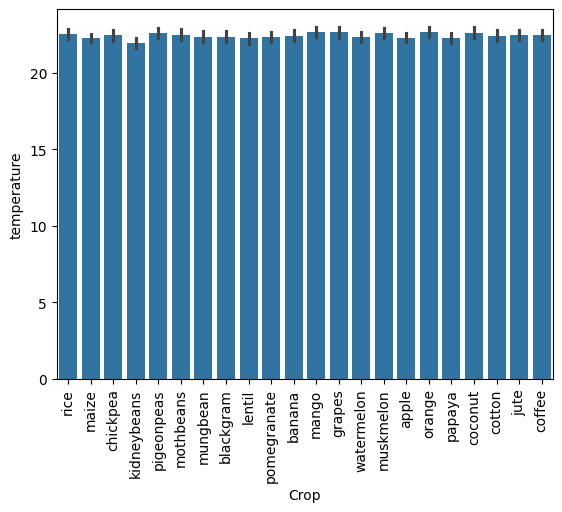

In [13]:
sns.barplot(x=crop_data["Crop"], y=crop_data["temperature"])
plt.xticks(rotation = 90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'rice'),
  Text(1, 0, 'maize'),
  Text(2, 0, 'chickpea'),
  Text(3, 0, 'kidneybeans'),
  Text(4, 0, 'pigeonpeas'),
  Text(5, 0, 'mothbeans'),
  Text(6, 0, 'mungbean'),
  Text(7, 0, 'blackgram'),
  Text(8, 0, 'lentil'),
  Text(9, 0, 'pomegranate'),
  Text(10, 0, 'banana'),
  Text(11, 0, 'mango'),
  Text(12, 0, 'grapes'),
  Text(13, 0, 'watermelon'),
  Text(14, 0, 'muskmelon'),
  Text(15, 0, 'apple'),
  Text(16, 0, 'orange'),
  Text(17, 0, 'papaya'),
  Text(18, 0, 'coconut'),
  Text(19, 0, 'cotton'),
  Text(20, 0, 'jute'),
  Text(21, 0, 'coffee')])

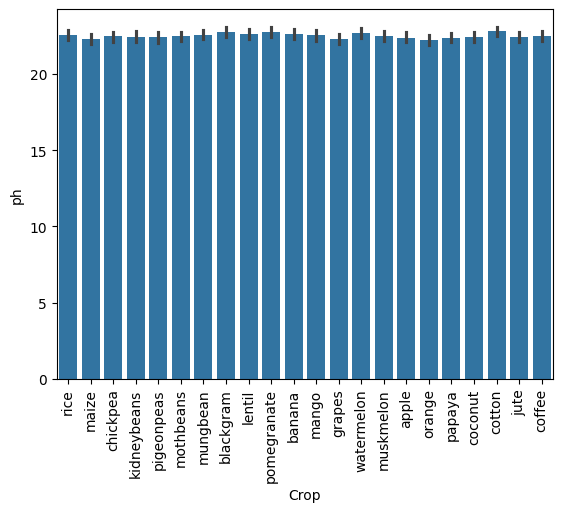

In [14]:
sns.barplot(x=crop_data["Crop"], y=crop_data["ph"])
plt.xticks(rotation = 90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'rice'),
  Text(1, 0, 'maize'),
  Text(2, 0, 'chickpea'),
  Text(3, 0, 'kidneybeans'),
  Text(4, 0, 'pigeonpeas'),
  Text(5, 0, 'mothbeans'),
  Text(6, 0, 'mungbean'),
  Text(7, 0, 'blackgram'),
  Text(8, 0, 'lentil'),
  Text(9, 0, 'pomegranate'),
  Text(10, 0, 'banana'),
  Text(11, 0, 'mango'),
  Text(12, 0, 'grapes'),
  Text(13, 0, 'watermelon'),
  Text(14, 0, 'muskmelon'),
  Text(15, 0, 'apple'),
  Text(16, 0, 'orange'),
  Text(17, 0, 'papaya'),
  Text(18, 0, 'coconut'),
  Text(19, 0, 'cotton'),
  Text(20, 0, 'jute'),
  Text(21, 0, 'coffee')])

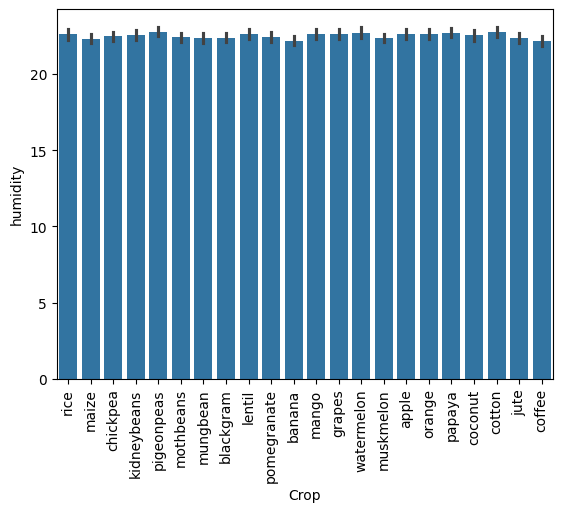

In [15]:
sns.barplot(x=crop_data["Crop"], y=crop_data["humidity"])
plt.xticks(rotation = 90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'rice'),
  Text(1, 0, 'maize'),
  Text(2, 0, 'chickpea'),
  Text(3, 0, 'kidneybeans'),
  Text(4, 0, 'pigeonpeas'),
  Text(5, 0, 'mothbeans'),
  Text(6, 0, 'mungbean'),
  Text(7, 0, 'blackgram'),
  Text(8, 0, 'lentil'),
  Text(9, 0, 'pomegranate'),
  Text(10, 0, 'banana'),
  Text(11, 0, 'mango'),
  Text(12, 0, 'grapes'),
  Text(13, 0, 'watermelon'),
  Text(14, 0, 'muskmelon'),
  Text(15, 0, 'apple'),
  Text(16, 0, 'orange'),
  Text(17, 0, 'papaya'),
  Text(18, 0, 'coconut'),
  Text(19, 0, 'cotton'),
  Text(20, 0, 'jute'),
  Text(21, 0, 'coffee')])

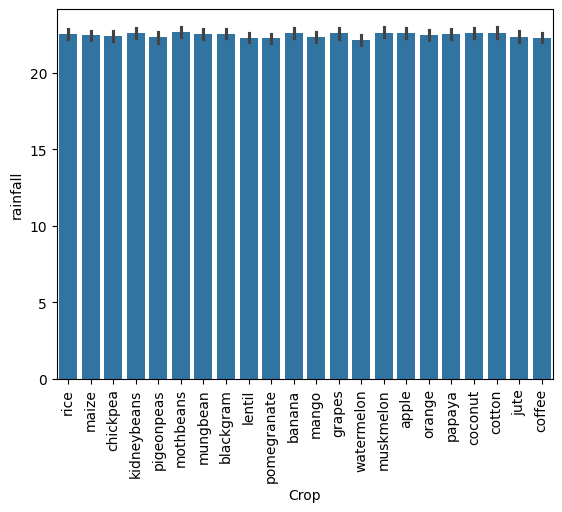

In [16]:
sns.barplot(x=crop_data["Crop"], y=crop_data["rainfall"])
plt.xticks(rotation = 90)

In [17]:
crop_data_numeric = crop_data.select_dtypes(include=["number"])
crop_data_numeric.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.005068,-0.022191,0.016703,0.009894
P,-0.231460,1.000000,0.736232,-0.018801,0.019857,-0.017157,0.033773
K,-0.140512,0.736232,1.000000,0.009641,0.017030,-0.029882,0.018772
temperature,0.005068,-0.018801,0.009641,1.000000,0.004557,0.045099,0.004153
humidity,-0.022191,0.019857,0.017030,0.004557,1.000000,0.012760,0.020621
ph,0.016703,-0.017157,-0.029882,0.045099,0.012760,1.000000,-0.044365
rainfall,0.009894,0.033773,0.018772,0.004153,0.020621,-0.044365,1.000000


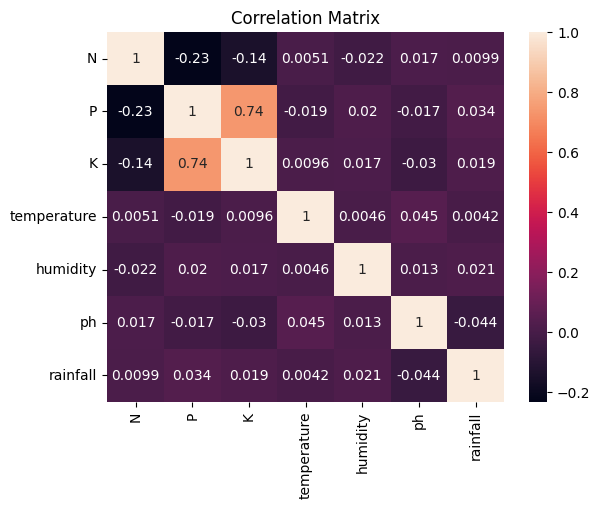

In [18]:
# 1. Select only numeric columns
crop_data_numeric = crop_data.select_dtypes(include=["number"])

# 2. Calculate correlation
corr = crop_data_numeric.corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [19]:
# shuffling the dataset to remove order
from sklearn.utils import shuffle

df  = shuffle(crop_data,random_state=5)
df.head()

,N,P,K,temperature,humidity,ph,rainfall,Crop
1270,6,140,205,21,20,23,23,grapes
1481,98,22,47,23,22,23,25,muskmelon
1832,38,14,30,20,23,25,22,coconut
293,35,63,76,23,22,25,25,chickpea
1307,85,22,53,25,24,24,22,watermelon


In [20]:
# Selection of Feature and Target variables.
x = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['Crop']

In [21]:
# Encoding target variable 
y = pd.get_dummies(target)
y

,apple,banana,blackgram,chickpea,coconut,coffee,cotton,grapes,jute,kidneybeans,...,mango,mothbeans,mungbean,muskmelon,orange,papaya,pigeonpeas,pomegranate,rice,watermelon
1270,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1481,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1832,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
293,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1307,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1032,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2121,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1424,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [22]:
# Splitting data set - 25% test dataset and 75% 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state= 0)

print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (1650, 7)
x_test : (550, 7)
y_train : (1650, 22)
y_test : (550, 22)


In [23]:
# Importing necessary libraries for multi-output classification

from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

### Naive Bayes Classification

In [24]:
gnb = GaussianNB()
model = MultiOutputClassifier(gnb, n_jobs=-1)
model.fit(x_train, y_train)

MultiOutputClassifier(estimator=GaussianNB(), n_jobs=-1)

In [25]:
gnb_pred = model.predict(x_test)
gnb_pred

array([[False, False,  True, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False]], shape=(550, 22))

In [26]:
# Calculating Accuracy
from sklearn.metrics import accuracy_score
a1 = accuracy_score(y_test.values.argmax(axis=1), gnb_pred.argmax(axis=1))
a1

0.5872727272727273

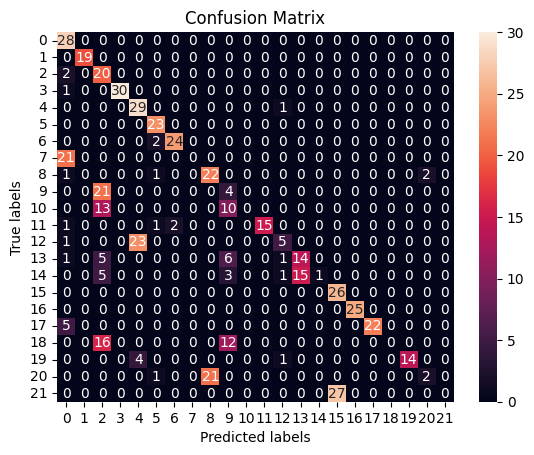

In [27]:
# creating a confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test.values.argmax(axis=1), gnb_pred.argmax(axis=1))
#cm = confusion_matrix(y_test, gnb_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [28]:
from sklearn import metrics
# Print the confusion matrix
print(metrics.confusion_matrix(y_test.values.argmax(axis=1), gnb_pred.argmax(axis=1)))

# Print the precision and recall, among other metrics
print(metrics.classification_report(y_test.values.argmax(axis=1), gnb_pred.argmax(axis=1), digits=3))

[[28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 29  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  1  0  0 22  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0 21  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 13  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  1  2  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0 23  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0]
 [ 1  0  5  0  0  0  0  0  0  6  0  0  1 14  0  0  0  0  0  0  0  0]
 [ 0  0  5  0  0  0  0  0  0  3  0

c:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

### Decision Tree Classification

In [29]:
# Training
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=6)
multi_target_decision = MultiOutputClassifier(clf, n_jobs=-1)
multi_target_decision.fit(x_train, y_train)

MultiOutputClassifier(estimator=DecisionTreeClassifier(random_state=6),
                      n_jobs=-1)

In [30]:
# Predicting test results 
decision_pred = multi_target_decision.predict(x_test)
decision_pred

array([[False, False,  True, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False]], shape=(550, 22))

In [31]:
# Calculating Accuracy
from sklearn.metrics import accuracy_score
a2 = accuracy_score(y_test.values.argmax(axis=1), decision_pred.argmax(axis=1))
a2

0.6036363636363636

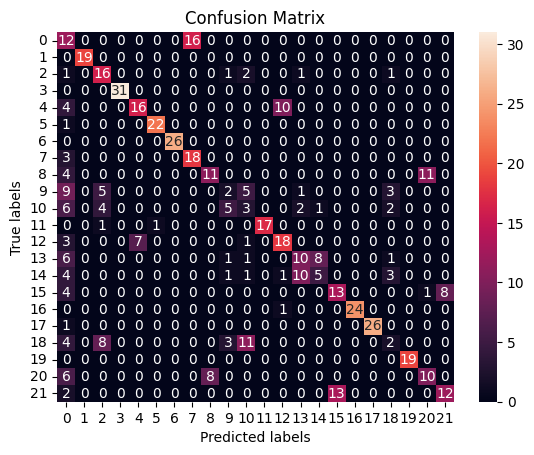

In [32]:
# creating a confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test.values.argmax(axis=1), decision_pred.argmax(axis=1))
#cm = confusion_matrix(y_test, gnb_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [33]:
from sklearn import metrics
# Print the confusion matrix
print(metrics.confusion_matrix(y_test.values.argmax(axis=1), decision_pred.argmax(axis=1)))

# Print the precision and recall, among other metrics
print(metrics.classification_report(y_test.values.argmax(axis=1), decision_pred.argmax(axis=1), digits=3))

[[12  0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0 16  0  0  0  0  0  0  1  2  0  0  1  0  0  0  0  1  0  0  0]
 [ 0  0  0 31  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  0  0  0 16  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0 11  0]
 [ 9  0  5  0  0  0  0  0  0  2  5  0  0  1  0  0  0  0  3  0  0  0]
 [ 6  0  4  0  0  0  0  0  0  5  3  0  0  2  1  0  0  0  2  0  0  0]
 [ 0  0  1  0  0  1  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  7  0  0  0  0  0  1  0 18  0  0  0  0  0  0  0  0  0]
 [ 6  0  0  0  0  0  0  0  0  1  1  0  0 10  8  0  0  0  1  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  1  1

### Random Forest Classification

In [34]:
# Training
forest = RandomForestClassifier(random_state=1)
multi_target_forest = MultiOutputClassifier(forest, n_jobs=-1)
multi_target_forest.fit(x_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(random_state=1),
                      n_jobs=-1)

In [35]:
# Predicting test results 
forest_pred = multi_target_forest.predict(x_test)
forest_pred

array([[False, False,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False]], shape=(550, 22))

In [36]:
# Calculating Accuracy
from sklearn.metrics import accuracy_score
a3 = accuracy_score(y_test.values.argmax(axis=1), forest_pred.argmax(axis=1))
a3

0.5

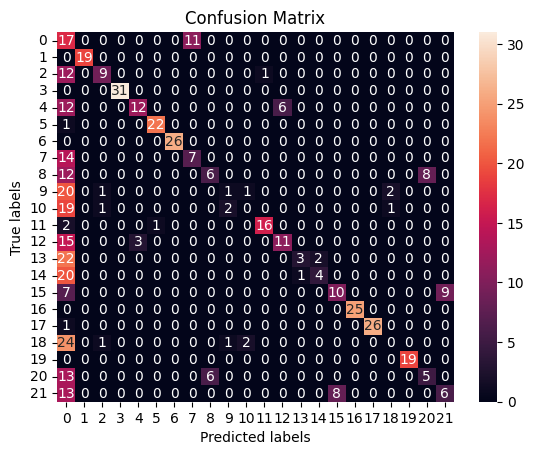

In [37]:
# creating a confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test.values.argmax(axis=1), forest_pred.argmax(axis=1))
#cm = confusion_matrix(y_test, gnb_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [38]:
from sklearn import metrics
# Print the confusion matrix
print(metrics.confusion_matrix(y_test.values.argmax(axis=1), forest_pred.argmax(axis=1)))

# Print the precision and recall, among other metrics
print(metrics.classification_report(y_test.values.argmax(axis=1), forest_pred.argmax(axis=1), digits=3))

[[17  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [12  0  9  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 31  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [12  0  0  0 12  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [14  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [12  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  8  0]
 [20  0  1  0  0  0  0  0  0  1  1  0  0  0  0  0  0  0  2  0  0  0]
 [19  0  1  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 2  0  0  0  0  1  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0]
 [15  0  0  0  3  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0]
 [22  0  0  0  0  0  0  0  0  0  0  0  0  3  2  0  0  0  0  0  0  0]
 [20  0  0  0  0  0  0  0  0  0  0

### KNN Classifier

In [39]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf=KNeighborsClassifier()
model = MultiOutputClassifier(knn_clf, n_jobs=-1)
model.fit(x_train, y_train)

MultiOutputClassifier(estimator=KNeighborsClassifier(), n_jobs=-1)

In [40]:
knn_pred = model.predict(x_test)
knn_pred

array([[False, False,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False]], shape=(550, 22))

In [41]:
# Calculating Accuracy
from sklearn.metrics import accuracy_score
a4 = accuracy_score(y_test.values.argmax(axis=1), knn_pred.argmax(axis=1))
a4

0.5709090909090909

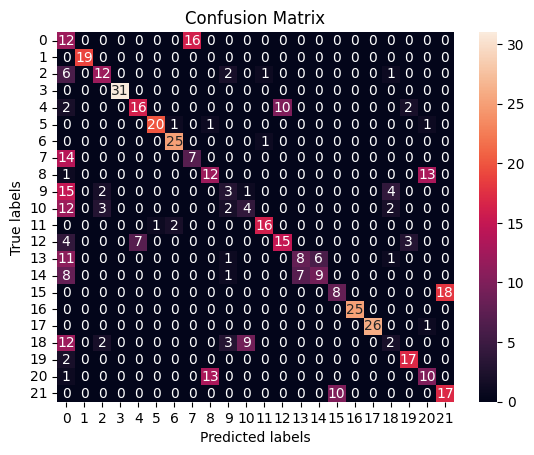

In [42]:
# creating a confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test.values.argmax(axis=1), knn_pred.argmax(axis=1))
#cm = confusion_matrix(y_test, gnb_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [43]:
from sklearn import metrics
# Print the confusion matrix
print(metrics.confusion_matrix(y_test.values.argmax(axis=1), knn_pred.argmax(axis=1)))

# Print the precision and recall, among other metrics
print(metrics.classification_report(y_test.values.argmax(axis=1), knn_pred.argmax(axis=1), digits=3))

[[12  0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 6  0 12  0  0  0  0  0  0  2  0  1  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0 31  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0 16  0  0  0  0  0  0  0 10  0  0  0  0  0  0  2  0  0]
 [ 0  0  0  0  0 20  1  0  1  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0 25  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [14  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0 13  0]
 [15  0  2  0  0  0  0  0  0  3  1  0  0  0  0  0  0  0  4  0  0  0]
 [12  0  3  0  0  0  0  0  0  2  4  0  0  0  0  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  1  2  0  0  0  0 16  0  0  0  0  0  0  0  0  0  0]
 [ 4  0  0  0  7  0  0  0  0  0  0  0 15  0  0  0  0  0  0  3  0  0]
 [11  0  0  0  0  0  0  0  0  1  0  0  0  8  6  0  0  0  1  0  0  0]
 [ 8  0  0  0  0  0  0  0  0  1  0

### Gradient Boosting

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()
model = MultiOutputClassifier(gb_clf, n_jobs=-1)
model.fit(x_train, y_train)

MultiOutputClassifier(estimator=GradientBoostingClassifier(), n_jobs=-1)

In [45]:
gf_pred = model.predict(x_test)
gf_pred

array([[False, False,  True, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False]], shape=(550, 22))

In [46]:
# Calculating Accuracy
from sklearn.metrics import accuracy_score
a5 = accuracy_score(y_test.values.argmax(axis=1), gf_pred.argmax(axis=1))
a5

0.5963636363636363

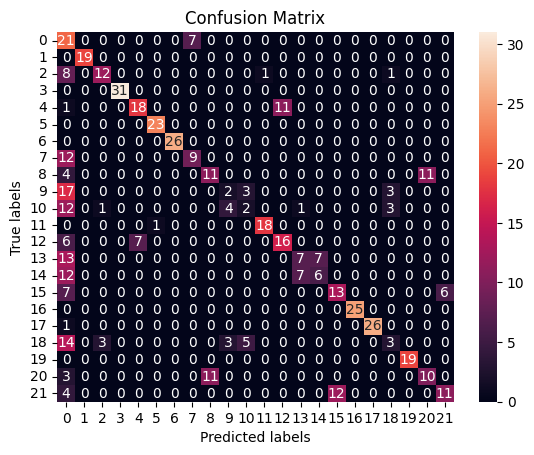

In [47]:
# creating a confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test.values.argmax(axis=1), gf_pred.argmax(axis=1))
#cm = confusion_matrix(y_test, gnb_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

In [48]:
from sklearn import metrics
# Print the confusion matrix
print(metrics.confusion_matrix(y_test.values.argmax(axis=1), gf_pred.argmax(axis=1)))

# Print the precision and recall, among other metrics
print(metrics.classification_report(y_test.values.argmax(axis=1), gf_pred.argmax(axis=1), digits=3))

[[21  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 8  0 12  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0 31  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0 18  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [12  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0 11  0]
 [17  0  0  0  0  0  0  0  0  2  3  0  0  0  0  0  0  0  3  0  0  0]
 [12  0  1  0  0  0  0  0  0  4  2  0  0  1  0  0  0  0  3  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0]
 [ 6  0  0  0  7  0  0  0  0  0  0  0 16  0  0  0  0  0  0  0  0  0]
 [13  0  0  0  0  0  0  0  0  0  0  0  0  7  7  0  0  0  0  0  0  0]
 [12  0  0  0  0  0  0  0  0  0  0

# Complete